In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
# read csv file
directory = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves'
file = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves/TIC_455029978.csv'

tic_id = file[file.rfind('_')+1:-4]
print(tic_id)

df = pd.read_csv(file)
df

455029978


,clean_time,clean_flux,trend_time,trend_flux,no_flare_raw_time,no_flare_raw_flux,raw_time,raw_flux
0,1438.043761,0.995919,1438.043761,1.002694,1438.043761,0.998602,1438.043761,0.998602
1,1438.045150,0.996150,1438.045150,1.002689,1438.045150,0.998829,1438.045150,0.998829
2,1438.046539,0.996065,1438.046539,1.002665,1438.046539,0.998719,1438.046539,0.998719
3,1438.047928,0.996635,1438.047928,1.002650,1438.047928,0.999276,1438.047928,0.999276
4,1438.049317,0.996087,1438.049317,1.002638,1438.049317,0.998715,1438.049317,0.998715
...,...,...,...,...,...,...,...,...
17200,NaN,NaN,NaN,NaN,NaN,NaN,1463.667763,0.986642
17201,NaN,NaN,NaN,NaN,NaN,NaN,1463.669151,0.986500
17202,NaN,NaN,NaN,NaN,NaN,NaN,1463.670540,0.990424
17203,NaN,NaN,NaN,NaN,NaN,NaN,1463.671929,0.983644


In [3]:
# read columns, turn into numpy arrays
clean_time = np.array(df['clean_time'])
clean_flux = np.array(df['clean_flux'])
trend_time = np.array(df['trend_time'])
trend_flux = np.array(df['trend_flux'])


In [4]:
# removing NaNs by masking 
mask = np.isfinite(clean_flux)

clean_time = clean_time[mask]
clean_flux = clean_flux[mask]
trend_time = trend_time[mask]
trend_flux = trend_flux[mask]

print(trend_flux)

[1.00269375 1.00268913 1.00266478 ... 0.99534238 0.9953226  0.99531851]


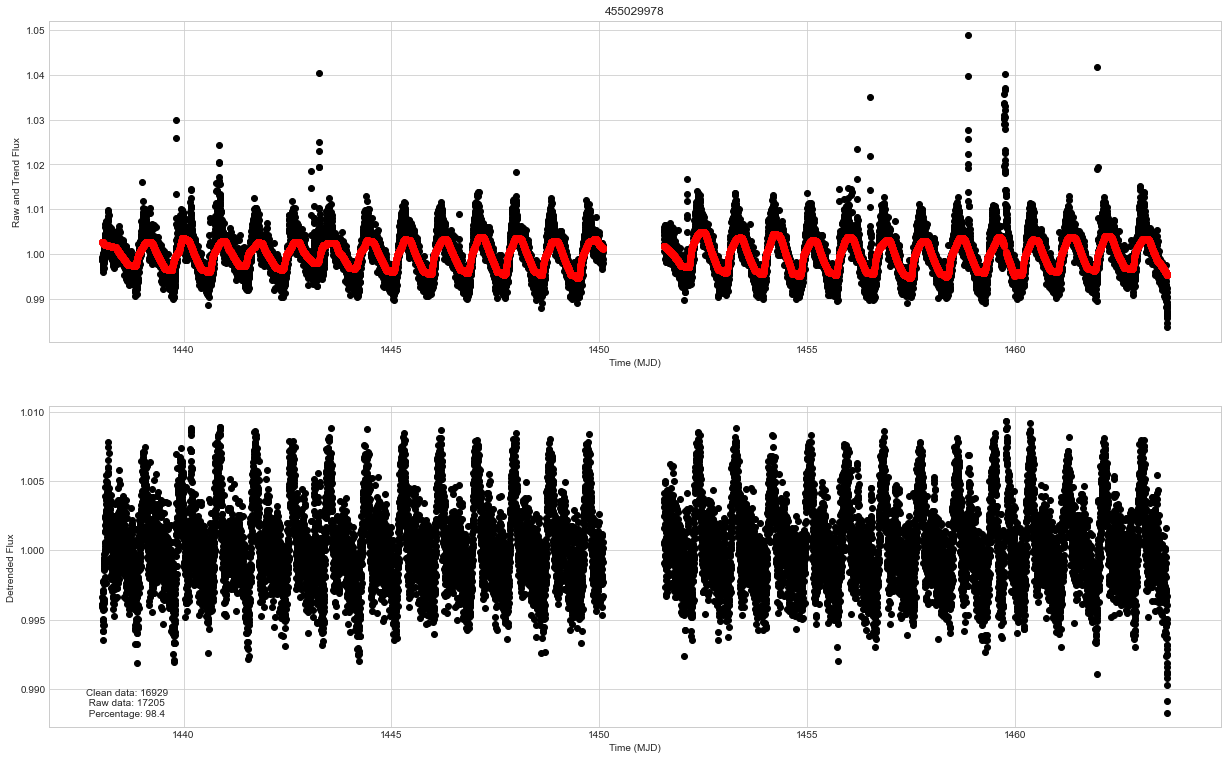

In [5]:
# all data are set, ready to graph
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(21,13))

# ax1
ax1.plot(df['raw_time'], df['raw_flux'], 'o', color='black')
ax1.plot(trend_time, trend_flux, 'o', color='red')
# ax1 labels
ax1.set_title(tic_id)
ax1.set_xlabel('Time (MJD)')
ax1.set_ylabel('Raw and Trend Flux')

# ax2
ax2.plot(clean_time, clean_flux, 'o', color='black')
# ax2 labels
ax2.set_xlabel('Time (MJD)')
ax2.set_ylabel('Detrended Flux')

# make a legend for ax2
str = "Clean data: {} \n Raw data: {} \n Percentage: {}".format(len(clean_time), 
        len(df['raw_time']), round(len(clean_time)/len(df['raw_time'])*100, 2))
plt.plot([], [], ' ', label=str)
plt.legend()
plt.show()

In [ ]:
# save files to folder
export_path = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/personal_epochs/lucas/light_curve_plots_two_min_lightcurves'
export_file_name = export_path + '/TIC_{}.png'.format(tic_id)
fig.savefig(export_file_name)